# Breast Cancer - ML

**Load Data**

In [14]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
x, y = load_breast_cancer(return_X_y = True)

**Data Shapes**

In [15]:
print("Features {}".format(x.shape))
print("Target {}".format(y.shape))

Features (569, 30)
Target (569,)


**Split data into training and test**

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, random_state=1)

**Normalize the data**

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Implement Classifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, \
                                    max_depth=4)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

0.9953051643192489

**Test the Classifier's accuracy**

In [19]:
from sklearn.metrics import accuracy_score
y_predicted = classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.965034965034965

**PCA - Principal Component Analysis**
Conversion into 2D

In [20]:
from sklearn.decomposition import PCA
df = load_breast_cancer()
x, y = load_breast_cancer(return_X_y = True)
# Normalize the data
sc = StandardScaler()
x_normalized = sc.fit_transform(x)
# Apply PCA on the data
pca = PCA(n_components = 2)
pca.fit(x_normalized)
pca_x = pca.transform(x_normalized)
pca_x.shape

(569, 2)

**Plot the graph**

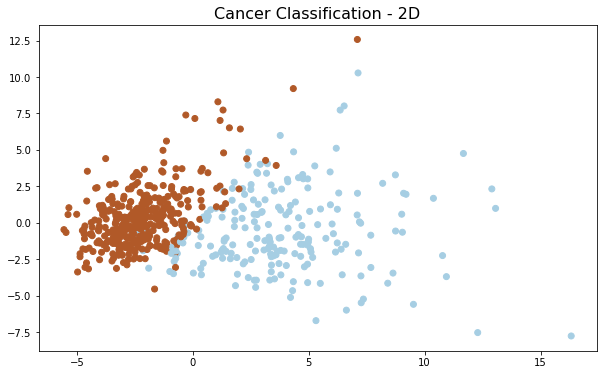

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Cancer Classification - 2D', fontsize=16)
plt.scatter(pca_x[:,0], pca_x[:,1], c=y, cmap='Paired')
plt.show()

**Applying Classifier on 2D PCA-ed data**

In [22]:
# split data
x_train, x_test, y_train, y_test = train_test_split(pca_x, y, random_state=1)
# make classifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=4)
classifier.fit(x_train, y_train)
print("Accuracy on training set {}".format(classifier.score(x_train, y_train)))
y_pred = classifier.predict(x_test)
print("Accuracy on test set {}".format(accuracy_score(y_test, y_pred)))

Accuracy on training set 0.9694835680751174
Accuracy on test set 0.9440559440559441


**Variance by PCA - 2D**

In [23]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

**PCA - Principal Component Analysis**
Conversion into 3D

In [24]:
x, y = load_breast_cancer(return_X_y = True)
# Normalize the data
sc = StandardScaler()
x_normalized = sc.fit_transform(x)
# Apply PCA on the data
pca3d = PCA(n_components = 3)
pca3d.fit(x_normalized)
pca_x_3d = pca3d.transform(x_normalized)
pca_x_3d.shape

(569, 3)

**Variance by PCA - 3D**

In [25]:
pca3d.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163])

**Plot 3D graph**

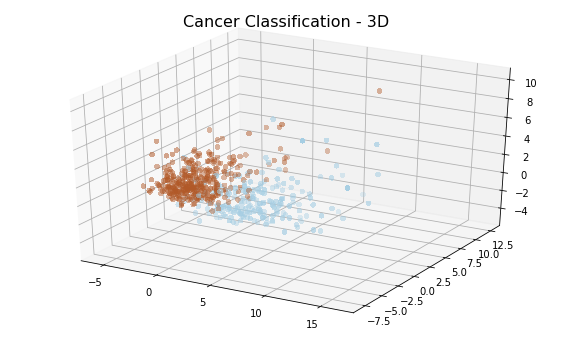

In [27]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np

fig_3d = plt.figure(figsize=(10,6))
ax = fig_3d.add_subplot(111, projection='3d')
x_points = pca_x_3d[:,0]
y_points = pca_x_3d[:,1]
z_points = pca_x_3d[:,2]

#z_points = np.reshape(z_points, (284,2))
#z_points = np.reshape(z_points, (569,2))

plt.title('Cancer Classification - 3D', fontsize=16)
#plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired')
#ax.plot_wireframe(x_points, y_points, z_points)
surf = ax.scatter3D(x_points, y_points, z_points, linewidth=0, antialiased=False, c=y, cmap='Paired')
plt.show()

array([-1.12316591e+00, -5.29292407e-01, -5.51747586e-01, -3.23278936e+00,
        1.38976694e+00, -2.93487680e+00, -1.63991282e+00, -8.71947230e-01,
       -3.11998596e+00, -4.34191589e+00, -4.88829702e-01, -1.52645547e+00,
        5.73023088e+00,  1.71717162e+00, -2.81611559e+00, -3.12527433e+00,
       -8.02519043e-01, -2.27031880e+00, -3.14749027e-01, -5.93283437e-01,
       -1.80144692e+00,  4.51187641e-01, -1.46653658e+00, -7.52402036e-01,
       -1.71319391e+00, -2.90092536e-02, -3.89454617e+00,  2.58174780e+00,
       -2.76162571e+00,  1.46187043e-01, -3.49239421e-01, -3.00146235e+00,
       -7.54300862e-01, -2.57738427e+00, -3.49376170e+00, -1.89696304e+00,
       -1.57576874e+00,  1.73230790e+00,  4.30557373e+00, -2.70491817e+00,
       -1.18048416e+00, -1.90472656e+00,  2.14122587e+00, -2.31073357e+00,
       -3.30193187e+00, -1.67884270e+00,  4.20747146e-02, -3.07808899e+00,
       -1.49241212e+00, -3.69159045e-01,  1.01821094e+00, -4.96293548e-01,
       -1.52517752e-01,  

In [19]:
zline = np.linspace(0, 15, 1000)
zline

array([ 0.        ,  0.01501502,  0.03003003,  0.04504505,  0.06006006,
        0.07507508,  0.09009009,  0.10510511,  0.12012012,  0.13513514,
        0.15015015,  0.16516517,  0.18018018,  0.1951952 ,  0.21021021,
        0.22522523,  0.24024024,  0.25525526,  0.27027027,  0.28528529,
        0.3003003 ,  0.31531532,  0.33033033,  0.34534535,  0.36036036,
        0.37537538,  0.39039039,  0.40540541,  0.42042042,  0.43543544,
        0.45045045,  0.46546547,  0.48048048,  0.4954955 ,  0.51051051,
        0.52552553,  0.54054054,  0.55555556,  0.57057057,  0.58558559,
        0.6006006 ,  0.61561562,  0.63063063,  0.64564565,  0.66066066,
        0.67567568,  0.69069069,  0.70570571,  0.72072072,  0.73573574,
        0.75075075,  0.76576577,  0.78078078,  0.7957958 ,  0.81081081,
        0.82582583,  0.84084084,  0.85585586,  0.87087087,  0.88588589,
        0.9009009 ,  0.91591592,  0.93093093,  0.94594595,  0.96096096,
        0.97597598,  0.99099099,  1.00600601,  1.02102102,  1.03

In [20]:
z_points.shape

(569,)